In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('pizza.csv')
print(data.head())

data=data.drop(['brand','id'], axis=1)
#data=data.values

  brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2     A  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3     A  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4     A  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67


In [11]:
import numpy as np

def pca(X, num_components):
    """
    Perform Principal Component Analysis on the input data.

    Parameters:
    - X: NumPy array, shape (n_samples, n_features)
        Input data matrix.
    - num_components: int
        Number of principal components to retain.

    Returns:
    - X_pca: NumPy array, shape (n_samples, num_components)
        Data matrix after PCA transformation.
    - eigenvectors: NumPy array, shape (n_features, num_components)
        Principal components (eigenvectors).
    """

    # Standardize the data (subtract mean and divide by standard deviation)
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Compute the covariance matrix
    #covariance_matrix = np.cov(X_standardized, rowvar=False)
    covariance_matrix = np.corrcoef(X_standardized, rowvar=False)

    # Compute the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvectors in descending order of eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]

    # Select the top 'num_components' eigenvectors
    selected_eigenvectors = eigenvectors[:, :num_components]
    selected_eigenvalues = eigenvalues[ :num_components]

    # Project the data onto the new subspace defined by the selected eigenvectors
    X_pca = np.dot(X_standardized, selected_eigenvectors)

    return X_pca, selected_eigenvectors, selected_eigenvalues

# Example usage:
# Assuming 'data' is your dataset as a NumPy array (n_samples, n_features)
# and you want to reduce it to 2 principal components:
num_components = 7 #num columns of dataset :)
data_pca, principal_components, eigenvalues = pca(data, num_components)
#print(data_pca)
print(principal_components)
print(eigenvalues)
# 'data_pca' now contains the data transformed into the principal component space.
# 'principal_components' contains the principal components (eigenvectors).

[[-6.47093729e-02  6.28275866e-01  4.21668945e-01 -2.20721584e-01
   6.47029345e-03 -4.46449902e-01 -4.18569035e-01]
 [-3.78760904e-01  2.69706650e-01 -7.46027442e-01 -1.05931982e-02
   3.87982788e-01  1.71520299e-04 -2.76764643e-01]
 [-4.46665915e-01 -2.34379085e-01  1.99308714e-01 -5.07042158e-01
  -1.73367634e-01  5.25402868e-01 -3.77671525e-01]
 [-4.71889526e-01  1.10990417e-01 -5.62726863e-02  5.52398549e-01
  -6.70885701e-01 -5.88609281e-02 -5.60214003e-02]
 [-4.35702887e-01 -2.01661652e-01  4.55168874e-01  4.46276890e-01
   6.02614079e-01 -3.13098518e-03  5.24323817e-04]
 [ 4.24913712e-01 -3.20312078e-01 -5.22365058e-02  3.34339481e-01
  -7.43689883e-03  5.08853524e-04 -7.76067911e-01]
 [-2.44487304e-01 -5.67457559e-01 -1.13315588e-01 -2.79263154e-01
  -7.80031747e-02 -7.21913853e-01 -1.20598098e-02]]
[4.17178190e+00 2.29045739e+00 4.14562342e-01 9.51742273e-02
 2.76770181e-02 3.37609355e-04 9.51878034e-06]


This is the explained variance of each feature (covariance):
	[5.96e+01 3.27e+01 5.92e+00 1.36e+00 3.95e-01 4.82e-03 1.36e-04]
This is the cumulative variance (covariance):
	[ 59.6   92.32  98.24  99.6  100.   100.   100.  ]


C:\Users\hanno\AppData\Local\Temp\ipykernel_31328\3568800269.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


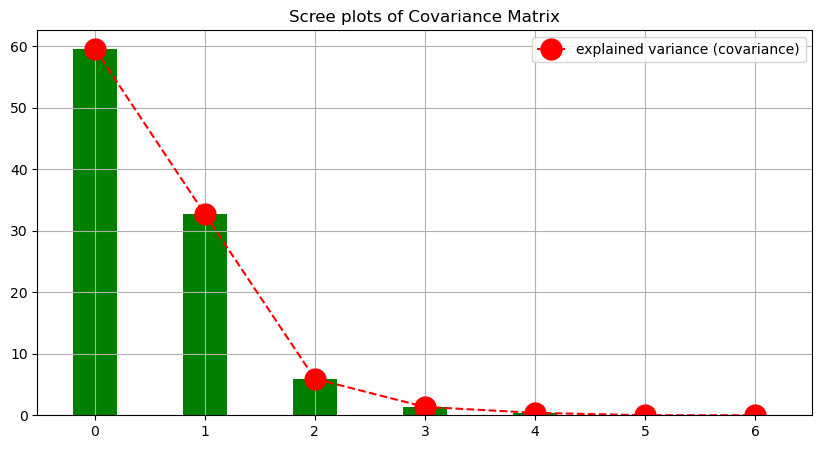

In [12]:

#YC = np.dot(principal_components)
#print("This is the dimension of the Y matrix \t {}\n\t(*) using the loadings of the covariance matrix C\n"
#      "\t(*) It must be equal to the dimension of the original dataset\n".format(np.shape(YC)))
def explained_variance_plot(eigenvalues, ax):
      total_variation_covariance = np.sum(eigenvalues)
      explained_variance_covariance = np.asarray(
      [100*(i/total_variation_covariance) for i in sorted(eigenvalues, reverse=True)])
      print("This is the explained variance of each feature (covariance):\n\t{}"
            .format(np.array_str(explained_variance_covariance, precision=2)))
      cumulative_covariance = np.cumsum(explained_variance_covariance)
      print("This is the cumulative variance (covariance):\n\t{}"
            .format(np.array_str(cumulative_covariance, precision=2)))

      #fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
      ax.set_title("Scree plots of Covariance Matrix")
      ax.bar(x=np.arange(np.shape(explained_variance_covariance)[0]), 
            height=explained_variance_covariance, 
            width=0.4, color="green")
      ax.plot(np.arange(np.shape(explained_variance_covariance)[0]), 
            explained_variance_covariance, 
            linestyle="--", marker="o", markersize=15,
            color="red", label="explained variance (covariance)")
      #axes.savefig("images/screeplot_covariance_pizza.png")
      ax.legend()
      ax.grid()
      return explained_variance_covariance

explained_variance_plot(eigenvalues)

7
7


C:\Users\hanno\AppData\Local\Temp\ipykernel_31328\726555662.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


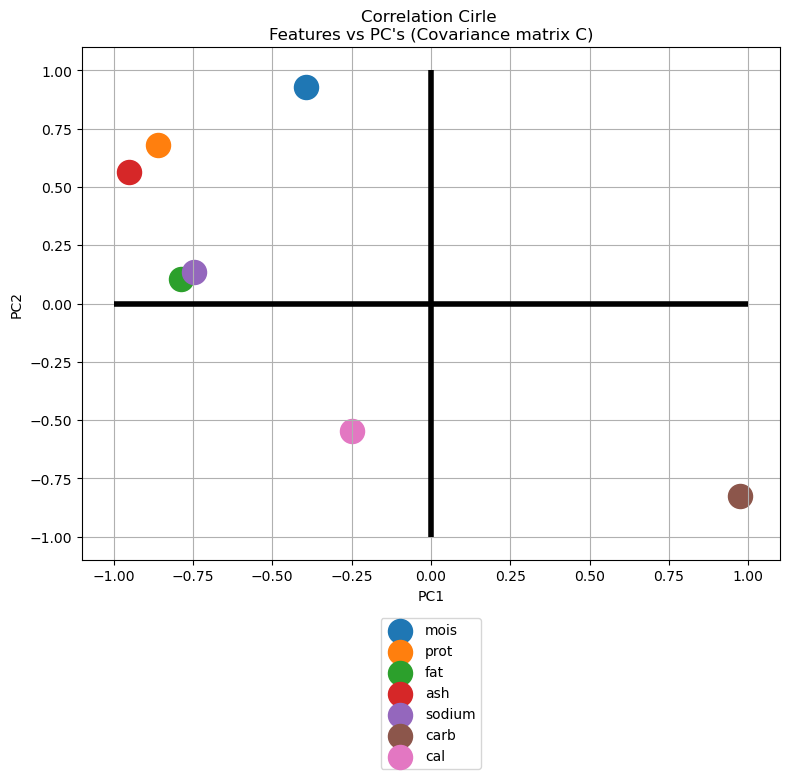

In [13]:
def corr_circle_plot(X,YC,data):
    CC_Covariance = []
    print(np.shape(X)[1])
    print(np.shape(YC)[1])
    for i in range(np.shape(X)[1]):
        f = []
        for j in range(np.shape(YC)[1]):
            c = (np.corrcoef(X[:,i], YC[:,j])[0])[1]
            f.append(c)
        CC_Covariance.append(f)
    CorrelationCircle_Covariance = np.asarray(CC_Covariance)

    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    ax.set_title("Correlation Cirle \nFeatures vs PC's (Covariance matrix C)")
    ax.hlines(y=0, xmin=-1, xmax=1, colors='black', linewidth=4, linestyle='solid')
    ax.vlines(x=0, ymin=-1, ymax=1, colors='black', linewidth=4, linestyle='solid')
    for i in range(0,np.shape(X)[1]):
        ax.scatter(CorrelationCircle_Covariance[i:i+1,0:1], 
                    CorrelationCircle_Covariance[i:i+1,1:2], s=300, label=data.columns[i])
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
            fancybox=True, ncol=1)
    ax.grid()
    fig.tight_layout()
    #plt.savefig("images/circle_correlation_covariance_pizza.png")
    fig.show()

X=data-np.mean(data, axis=0)
YC = X.dot(principal_components)
corr_circle_plot(np.asarray(X),np.asarray(YC),data)

In [3]:
import numpy as np

def ppca(X, num_components,W_init=None,sigma=1, max_iter=100, tol=1e-4):
    """
    Perform Probabilistic Principal Component Analysis on the input data.

    Parameters:
    - X: NumPy array, shape (n_samples, n_features)
        Input data matrix.
    - num_components: int
        Number of latent dimensions (principal components).
    - max_iter: int, optional
        Maximum number of iterations for the EM algorithm.
    - tol: float, optional
        Convergence tolerance.

    Returns:
    - W: NumPy array, shape (n_features, num_components)
        Projection matrix (principal components).
    - Z: NumPy array, shape (n_samples, num_components)
        Latent variables.
    - sigma_squared: float
        Noise variance.
    """

    # Center the data
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # parameter initialisation
    n_samples, n_features = X.shape
    if W_init != None:
        W=W_init
    else:
        W = np.random.randn(n_features, num_components)
    W=W_init

    if sigma !=None:
        sigma_squared=sigma
    else:
        sigma_squared=1
    
    
    Z = np.dot(X_centered, W) # dot product of data and W
    sigma_squared = 1.0

    for iteration in range(max_iter):
        # E-step: Compute the posterior distribution over latent variables
        M = np.dot(W.T, W) + sigma_squared * np.eye(num_components)
        E_z = np.linalg.solve(M, np.dot(W.T, X_centered.T)).T
        
        # M-step: Update parameters
        W = np.dot(X_centered.T, E_z) @ np.linalg.inv(np.dot(E_z.T, E_z))
        sigma_squared = np.sum(np.square(X_centered - np.dot(E_z, W.T))) / (n_samples * n_features)

        #print(E_z.shape)
        #print(np.dot(X_centered, W))
        # Check for convergence
        if np.linalg.norm(E_z - np.dot(X_centered, W)) < tol:
            print(iteration)
            break

    return W, E_z, sigma_squared

# Example usage:
# Assuming 'data' is your dataset as a NumPy array (n_samples, n_features)
# and you want to reduce it to 2 latent dimensions:
num_components = 2
W_init = np.random.randn(data.shape[1], num_components)
print(W_init)
projection_matrix, latent_variables, sigma_squared = ppca(data, num_components,W_init)
print(projection_matrix)
print(principal_components)
# 'projection_matrix' contains the projection matrix (principal components).
# 'latent_variables' contains the latent variables.
# 'noise_variance' contains the estimated noise variance.

num_trials=1000
sigma_lst=[]
W_lst=[]
num_components=2
for _ in range(num_trials):
    # Random initialization of W and sigma
    W_init = np.random.randn(data.shape[1], num_components)
    
    sigma_init = np.random.rand()

    print(sigma_init)
    # PPCA with random initialization
    W, E_z, sigma_squared = ppca(data, num_components, W_init, sigma_init,10000,1e-20)
    sigma_lst.append([sigma_squared])
    W_lst.append(W)

print(sigma_lst)


[[ 0.59647902  2.16090649]
 [-0.67541497 -1.23246159]
 [-0.07883102  0.76491273]
 [-0.09595455 -0.73295814]
 [-1.65048236 -1.44348321]
 [ 0.63951749  0.04787601]
 [ 1.40465882  0.27031654]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
pages=4-7
# change additional parameters of ppca!